<a target="_blank" href="https://colab.research.google.com/github/cyneuro/ML_camp/blob/main/camp_logistic_regression.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Logistic Regression

[Video: Logistic Regression](https://youtu.be/yIYKR4sgzI8?si=8fXB3GGjcA6dfzzG)

## Classification

In linear regression, the computer uses a line to *fit* the data. In logistic regression, the computer uses a line to *split* the data into two **classes**.

The goal of logistic regression is to define a line so that data in one class falls on one side of the line and data in the other class falls on the other side. In the image below, the blue line splits the two black and red classes. This means that the model believes that any point that falls *above* the line is part of the black class, and any point that falls *below* the line is part of the red class.

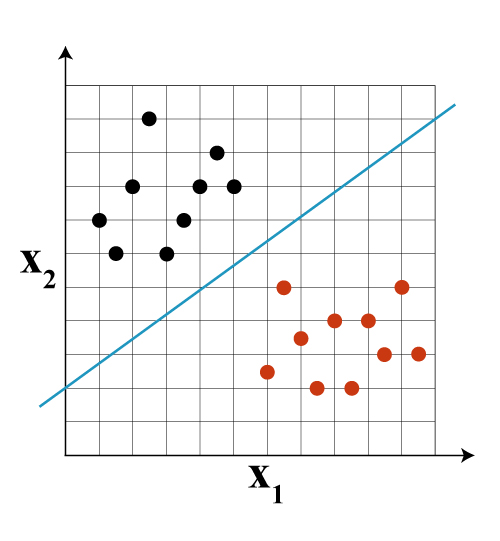

Logistic regression is used for classification problems, which means that the target variable can be of one of $K$ distinct classes. Here we discuss binary logistic regression, so that $y_i$ can be either $0$ or $1$.

For example, let's look at the data below.

<table width=25%>
  <tr>
    <th colspan=2>$X$</th>
    <th>$y$</th>
  </tr>
  <tr>
    <th>$x_1$</th>
    <th>$x_2$</th>
    <th>$y_i$</th>
  </tr>
  <tr>
    <td align=center>$-2$</td>
    <td align=center>$1$</td>
    <td align=center>$0$</td>
  </tr>
  <tr>
    <td align=center>$-1$</td>
    <td align=center>$3$</td>
    <td align=center>$1$</td>
  </tr>
  <tr>
    <td align=center>$-1$</td>
    <td align=center>$-1$</td>
    <td align=center>$0$</td>
  </tr>
  <tr>
    <td align=center>$2$</td>
    <td align=center>$-2$</td>
    <td align=center>$0$</td>
  </tr>
  <tr>
    <td align=center>$2$</td>
    <td align=center>$1$</td>
    <td align=center>$1$</td>
  </tr>
  <tr>
    <td align=center>$3$</td>
    <td align=center>$-1$</td>
    <td align=center>$1$</td>
  </tr>
</table>

As you see in the table, $X$ represents *all* of the ($x_1$, $x_2$) pairs in the dataset.
<br>
Each input feature vector $X_i$ (($x_1$, $x_2$) pair) is assigned a class $y_i$ ($0$ or $1$).
<br>
The model's goal is to learn how to classify a data point as $0$ or $1$ based on its features. Here, the features are just 2D coordinates, but in larger problems there may be dozens of features like weight, height, temperature, or any other metric you can think of.
<br></br>
Let's take a look at this data on a graph (Class $0$ = blue, Class $1$ = red):

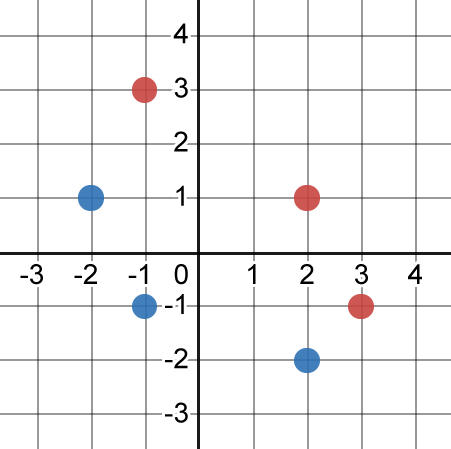

## Activity 1 - Frame the problem *(You solve)*

Consider the 2D logistic regression problem shown above. How might we frame the problem to define a line that splits the two classes optimally?
<br>
What is loss in this problem and how would we minimize it?
<br></br>
Write down your thoughts before moving forward.

## The model

Logistic regression can be visually represented as follows. Below we look at each component of the model.

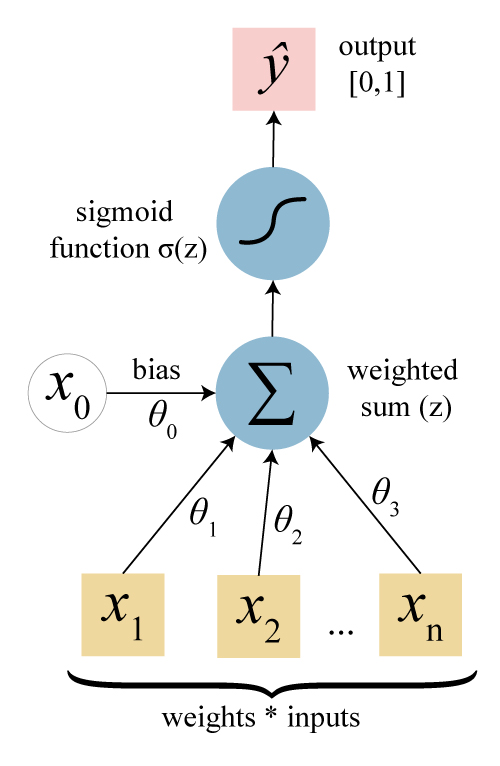


### Weights and bias

Logistic regression uses **weights** and **bias** to adjust its computation to produce more accurate outputs. These are the line's parameters like slope and the intercept that are adjusted during training.

Recall, in linear regression the estimated output is defined as $\hat{y_i}=mx_i + b$. Here, $m$ is the *weight* because it multiplies the input $x_i$, while $b$ is the *bias* which is simply added on.

### Weighted Sum

When the inputs ($x_0, x_1, x_2, x_3...x_n$) are taken in, the perceptron calculates $z$, the **weighted sum*** The weighted sum is the dot product of the weights and inputs plus the bias

$$
z=\theta_0x_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n
$$

To understand what $z$ means better, let us look back at the 2D example with red and blue circles.

In this problem, there are two features, $x_1$ and $x_2$. A line in the 2D plane can be defined by:
$$x_2=mx_1+b$$

Move all variables to one side:
$$x_2-mx_1-b=0$$
<br>
Now, we can change $m$ and $b$ to $\theta$ notation for the weights and biases.

$$\theta_2x_2+\theta_1x_1+\theta_0=0$$
$$...$$
$$\theta_2x_2+\theta_1x_1+\theta_0=z$$

So, what does this weighted sum mean? Just like linear regression, it defines a line given some parameters ($\theta_i$).
<br>
If a data point ($x_1, x_2$) from the dataset lies on the line, $z=0$.
<br>
If a data point lies *above* the line, $z>0$.
<br>
If a data point lies *below* the line, $z<0$.
<br>

**Whether a data point's $z$ value is negative or nonnegative determines the model's classification of that point.**



### Activity 2 - Calculate weighted sum *(You solve)*

Pick random numbers for $\theta_0$, $\theta_1$, and $\theta_2$.
<br>
Plot the line using the $z$ equation:
$$\theta_2x_2+\theta_1x_1+\theta_0=0$$
<br>
Choose $(x_1, x_2)$ coordinates that lie above, on, and below the line and calculate their $z$ value.
<br>
Do your calculations make sense according to the purpose of the weighted sum?
<br></br>

In [ ]:
#@title Run this code once you have finished the activity

from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
import random

# Set random seed for reproducibility
np.random.seed()

# Randomly initialize weights and bias
theta_0 = np.random.uniform(1, 2)
theta_1 = np.random.uniform(1, 2)
theta_2 = np.random.uniform(1, 2)

# Generate x1 values
x1 = np.linspace(-10, 10, 400)

# Calculate x2 values
# θ0 + θ1x1 + θ2x2 = 0
# θ2x2 = -θ1x1 - θ0
# x2 = (-θ1x1 - θ0)/θ2
x2 = (-theta_1 * x1 - theta_0) / theta_2

fig, ax = plt.subplots()

# Plot the decision boundary
ax.plot(x1, x2, 'tab:blue', label='Decision Boundary')

# Generate random coordinates for points above, on and below the line
points_above = np.random.uniform(low=-10, high=10, size=(5, 1))
points_above = np.column_stack((points_above, ((-theta_1 * points_above - theta_0) / theta_2) + np.random.uniform(3,5, size=(5,1))))

points_on = np.random.uniform(low=-10, high=10, size=(5, 1))
points_on = np.column_stack((points_on, (-theta_1 * points_on - theta_0) / theta_2))

points_below = np.random.uniform(low=-10, high=10, size=(5, 1))
points_below = np.column_stack((points_below, ((-theta_1 * points_below - theta_0) / theta_2) - np.random.uniform(3,5, size=(5,1))))

# Plot the points
ax.scatter(*points_above.T, label='Above')
ax.scatter(*points_on.T, label='On')
ax.scatter(*points_below.T, label='Below')

# Calculate and print z values
for label, points in [('Above', points_above), ('On', points_on), ('Below', points_below)]:
    z_values = theta_0 + theta_1 * points[:, 0] + theta_2 * points[:, 1]
    print(f'Z-values for points {label} the line: {z_values}')

# Set plot limits and labels
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.grid()
ax.set_aspect('equal', adjustable='box')
ax.legend()

plt.show()


### Sigmoid Function

The weighted sum ($z$) determines the assignment of a data point to one of two classes – this is known as hard classification. However, on real problems, we are often interested in probability of the point beloning to each class, so that we can make the classification decision ourselves – this is known as soft classification. Logistic regression supports soft classification by using the **sigmoid function** to map the weighted sum to the interval between $0$ and $1$.

$$\sigma(z)=\frac{1}{1+e^{-z}}$$

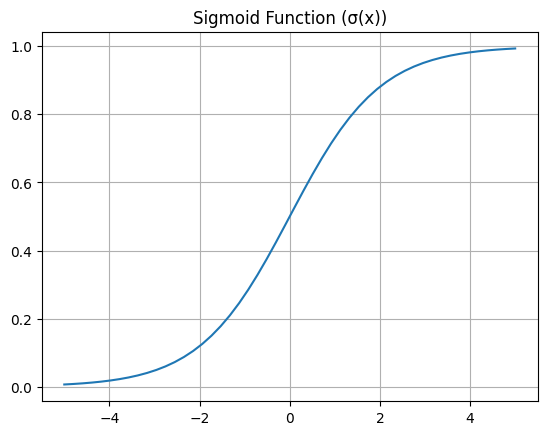

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1 + np.exp(-x))

x = np.linspace(-5, 5)
y = sigmoid(x)

fig, ax = plt.subplots()

ax.set_title('Sigmoid Function (σ(x))')

ax.plot(x, y);


If $z$ is a large *negative* number, $e^{-z}$ becomes a very large *positive* number, making the output close to $0$.
If $z$ is a large *positive* number, $e^{-z}$ becomes very close to $0$, making the output close to $1$.
If $z=0$, the $\sigma(z)=0.5$.
<br></br>
In essence, the more *positive* $z$ is, the closer $\sigma(z)$ is to $1$. The more *negative* $z$ is, the closer $\sigma(z)$ is to $0$.

Now we can choose a threshold on $\sigma(z)$ to assign a data point to one of the classes. For example,

If $\sigma(z) \ge 0.5$, the data point is classified as a $1$. If $\sigma(z)<0.5$, the data point is classified as a $0$.

### Loss function for logistic regression

The loss function typically used for logistic regression is known as **cross entropy**:
$$
L(\theta) = -\frac{1}{N}\sum_{i=1}^N y_i \log \hat{p}(y_i) + (1-y_i)\log(1 - \hat{p}(y_i))
$$

– as it properly interprets the sigmoid output as a *probability*.

To train and optimize the logistic regression model, the weights and biases ($\theta$) must be updated in the direction that minimizes loss with ***gradient descent***, just as in linear regression.
<br></br>

### Update Rule

Parameters (weights and bias) are updated with the standard update rule, descending the loss' slope with respect to the parameters ($\frac{∂L}{∂\theta_i}$) at a specified learning rate ($\alpha$).

$$\theta_i := \theta_i - \alpha\times\frac{∂L}{∂\theta_i}$$

### **Logistic Regression With sklearn**

Using the machine learning library `sklearn`, we can solve the logistic regression problem from earlier with the blue and red circles.

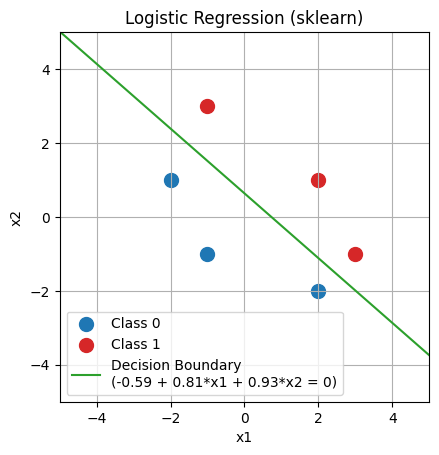

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------------------#

# Data

# Input features
X = np.array(
    [[-2, 1],
     [-1, 3],
     [-1, -1],
     [2, -2],
     [2, 1],
     [3, -1]])

# Target classes
y = np.array([0, 1, 0, 0, 1, 1])

#------------------------------------------------#

# Create a LogisticRegression model
model = LogisticRegression()

# Fit the model to the dataset
model.fit(X, y)

#------------------------------------------------#

# Plotting

fig, ax = plt.subplots()

# Separate data by class
classes = {0: [], 1: []}
data = zip(X, y)
for x_i, y_i in zip(X, y):
  classes[y_i].append(x_i)

# Plot dataset
ax.scatter(*np.asarray(classes[0]).T, color='tab:blue', s=100, label='Class 0')
ax.scatter(*np.asarray(classes[1]).T, color='tab:red', s=100, label='Class 1')

# Plot decision boundary
# Get θ-values from the model
theta_0 = model.intercept_[0]
theta_1, theta_2 = model.coef_[0]

x_in = np.linspace(-5, 5, 100)
y_pred = (-theta_1 * x_in - theta_0) / theta_2

ax.plot(x_in, y_pred, color='tab:green', label=f'Decision Boundary\n({theta_0:.2f} + {theta_1:.2f}*x1 + {theta_2:.2f}*x2 = 0)')

ax.grid()
ax.set_title('Logistic Regression (sklearn)')
ax.set_aspect(aspect='equal', adjustable='box')
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='lower left')

plt.show()

## Activity 3 – Classifying the Iris dataset

The Iris dataset is a dataset collected by Edgar Anderson in 1935 on four features (sepal length, sepal width, petal length, and petal width) of three species of Iris flowers (setosa, virginica, and versicolor). [Iris Dataset Information](http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html)

The dataset consists of 50 samples per species, amounting to 150 samples total, each sample containing the values of the four features and their respective species classification.

Though there are three classes (setosa, virginica, and versicolor), we can change the problem into binary classification (two classes) by splitting the data into *setosa* ($0$) and *not setosa* ($1$).

**Solve this classification problem with logistic regression.**

In [ ]:
from sklearn import datasets

# Data

# Load the iris dataset
iris = datasets.load_iris()

# Sepal Length, Sepal Width, Petal Length and Petal Width
X = iris.data

# Setosa (0), Versicolour (1), and Virginica (2)
y = iris.target

# To change this problem to binary classification (2 classes), let's
# change the problem to classifying Setosa (0) and NOT Setosa (1) by changing all 2s to 1
y = [1 if y_i == 2 else y_i for y_i in y]

In [ ]:
# Your code here

# Additional Material – Logistic Regression With PyTorch

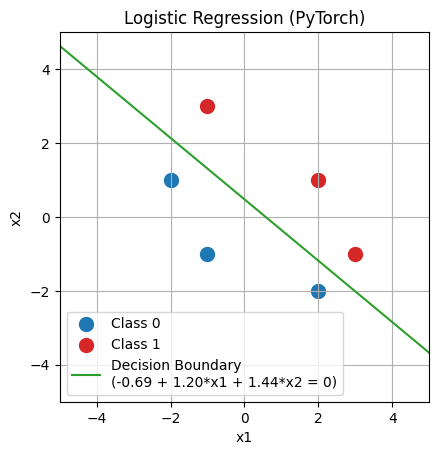

In [ ]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------------------#

# Data

# Input features
X = torch.tensor(
    [[-2.0, 1.0],
     [-1.0, 3.0],
     [-1.0, -1.0],
     [2.0, -2.0],
     [2.0, 1.0],
     [3.0, -1.0]])

# Target classes
y = torch.tensor([0.0, 1.0, 0.0, 0.0, 1.0, 1.0]).view(-1, 1)

#------------------------------------------------#

# Define a LogisticRegression model
class LogisticReg(torch.nn.Module):
  def __init__(self):
    super(LogisticReg, self).__init__()
    self.linear = torch.nn.Linear(2,1)

  def forward(self, X):
    # Compute weighted sum
    z = self.linear(X)
    # Apply sigmoid function to obtain prediction
    return torch.sigmoid(z)

# Create a LogisticReg object
model = LogisticReg()

# Define a loss function (mean squared error) and optimizer (gradient descent)
loss_function = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

# Fit the model
for epoch in range(500):
  # Feed inputs into model to get predictions
  y_pred = model(X)

  # Calculate loss
  loss = loss_function(y_pred, y)

  # Reset gradients to zero to prepare for calculations
  optimizer.zero_grad()
  # Calculate gradients
  loss.backward()
  # Update parameters
  optimizer.step()

#------------------------------------------------#

# Plotting

fig, ax = plt.subplots()

# Convert from tensors to numpy arrays for plotting
X_np = X.numpy()
y_np = y.numpy().T[0]
y_pred_np = model(X).detach().numpy()

# Sort data by class
classes = {0: [], 1: []}
for x_i, y_i in zip(X_np, y_np):
  classes[y_i].append(x_i)

# Plot the X (x1, x2) data for each class
ax.scatter(*np.array(classes[0]).T, color='tab:blue', s=100, label='Class 0')
ax.scatter(*np.array(classes[1]).T, color='tab:red', s=100, label='Class 1')

# Get weights and bias to find hypothesis line (decision boundary)
theta_0 = model.linear.bias.data[0]
theta_1 = model.linear.weight.data[0][0]
theta_2 = model.linear.weight.data[0][1]

# Generate coordinates of the decision boundary line
x_boundary = np.linspace(-5, 5, 100)
y_boundary = (-theta_1 * x_boundary - theta_0) / theta_2

# Plot the decision boundary
ax.plot(x_boundary, y_boundary, color='tab:green', label=f'Decision Boundary\n({theta_0:.2f} + {theta_1:.2f}*x1 + {theta_2:.2f}*x2 = 0)')

# Adjust the plot
ax.set_title('Logistic Regression (PyTorch)')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_aspect('equal', adjustable='box')
ax.legend(loc='lower left')
ax.grid()

# Display the plot
plt.show()
